<a href="https://colab.research.google.com/github/Ste881/Laptop-price-prediction/blob/main/laptop_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration and Understanding:

  * Dive into the dataset to understand the landscape of laptop specifications.

  * Visualize trends in laptop prices and identify potential influential features.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#imports for data transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [24]:
df = pd.read_csv('/content/laptop.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Data Preprocessing:

* Handle missing values, outliers, and encode categorical variables.

* Ensure the dataset is ready for model training.

In [25]:
#Removing unnecessary column
eliminate = ['Unnamed: 0.1','Unnamed: 0']
df.drop(columns= eliminate, inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [26]:
# Function to extract numbers
def extract_numbers(text):
    if isinstance(text, str):
        # Extract numbers
        numbers = re.findall(r'\d+x\d+|\d*\.?\d+', text)
        # Join the extracted numbers into a single string
        extracted_numbers = ' '.join(numbers)
        return extracted_numbers
    else:
        return ''

# Apply the function to the diff columns
df['Ram'] = df['Ram'].apply(extract_numbers)
df['Weight'] = df['Weight'].apply(extract_numbers)

df = df.rename(columns={'Ram': 'Ram_Gb', 'Weight': 'Weight_Kg'})

df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_Gb,Memory,Gpu,OpSys,Weight_Kg,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [27]:
def convert_to_categorical(df, columns):
    # Convert specified columns to categorical
    for col in columns:
        df[col] = df[col].replace('?', None)  # Replace '?' with None
        df[col] = df[col].fillna(df[col].mode()[0]) #Replace None with mode
        df[col] = df[col].astype('category')  # Convert to categorical
    return df

def convert_to_numeric(df, columns):
    # Convert specified columns to numeric
    for col in columns:
        df[col] = pd.to_numeric(df[col].replace('?', None), errors='coerce')  # Replace '?' with None
        df[col] = df[col].fillna(df[col].dropna().mean() if df[col].notna().any() else 0)  # Replace None with mean
    return df

cat_columns = ['Company', 'TypeName', 'ScreenResolution','Cpu', 'Memory', 'Gpu', 'OpSys']
num_columns = ['Inches', 'Ram_Gb', 'Weight_Kg', 'Price']
df = convert_to_categorical(df, cat_columns)
df = convert_to_numeric(df, num_columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1303 non-null   category
 1   TypeName          1303 non-null   category
 2   Inches            1303 non-null   float64 
 3   ScreenResolution  1303 non-null   category
 4   Cpu               1303 non-null   category
 5   Ram_Gb            1303 non-null   float64 
 6   Memory            1303 non-null   category
 7   Gpu               1303 non-null   category
 8   OpSys             1303 non-null   category
 9   Weight_Kg         1303 non-null   float64 
 10  Price             1303 non-null   float64 
dtypes: category(7), float64(4)
memory usage: 63.7 KB


In [28]:
null_count = df.isnull().sum()
total_null_count = null_count.sum()
print('Number of null values:\n')
for column, count in zip(null_count.index.str.strip(), null_count.values):
    print(f"{column}: {count}")
print('\nTotal null count:', total_null_count)


Number of null values:

Company: 0
TypeName: 0
Inches: 0
ScreenResolution: 0
Cpu: 0
Ram_Gb: 0
Memory: 0
Gpu: 0
OpSys: 0
Weight_Kg: 0
Price: 0

Total null count: 0


In [29]:
df.describe()

,Inches,Ram_Gb,Weight_Kg,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.130818,8.462687,2.077618,59955.814073
std,1.931029,5.499929,0.798133,36899.649480
min,10.100000,1.000000,0.000200,9270.720000
25%,14.000000,4.000000,1.540000,32650.250400
50%,15.600000,8.000000,2.060000,52747.200000
75%,15.600000,8.000000,2.310000,78561.360000
max,35.600000,64.000000,11.100000,324954.720000


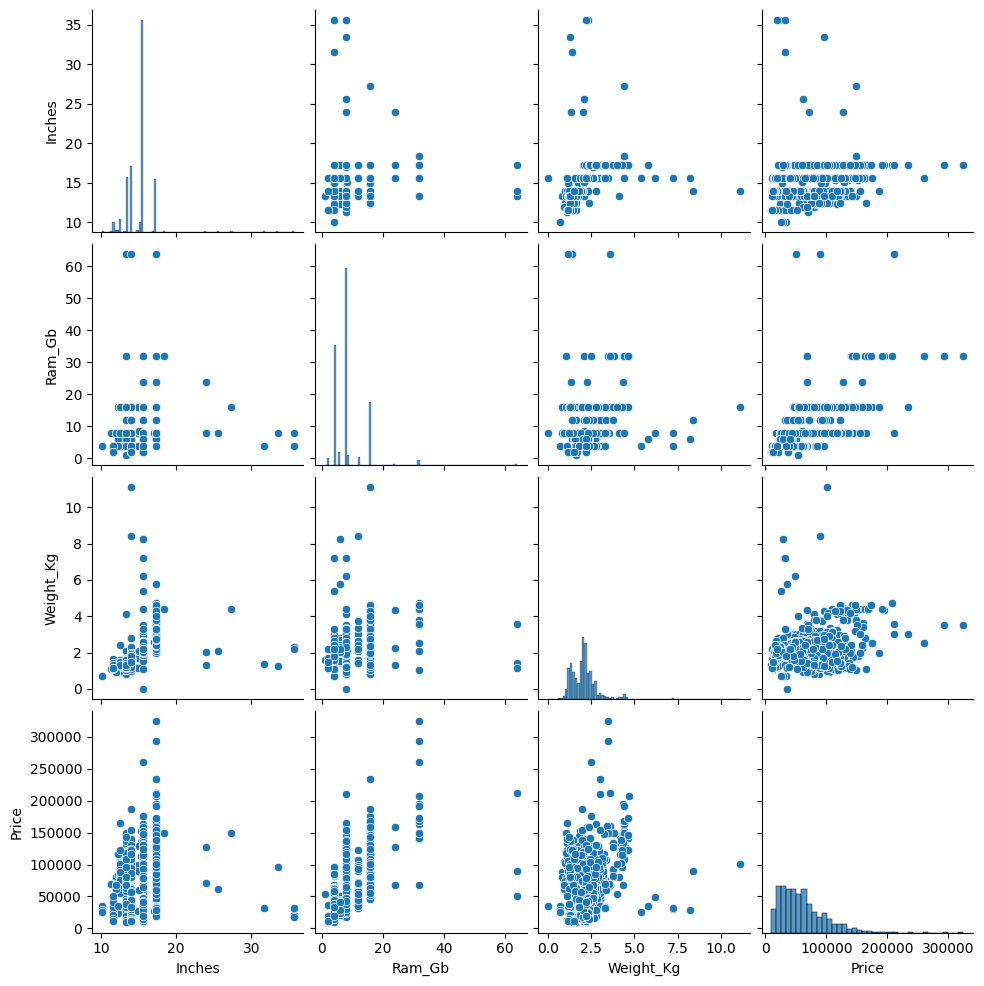

In [30]:
cols = ["Inches", "Ram_Gb", "Weight_Kg", "Price"]

# Create pairplot
sns.pairplot(data=df[cols])

# Show the plot
plt.show()

In [31]:
#removing duplicates
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1245 non-null   category
 1   TypeName          1245 non-null   category
 2   Inches            1245 non-null   float64 
 3   ScreenResolution  1245 non-null   category
 4   Cpu               1245 non-null   category
 5   Ram_Gb            1245 non-null   float64 
 6   Memory            1245 non-null   category
 7   Gpu               1245 non-null   category
 8   OpSys             1245 non-null   category
 9   Weight_Kg         1245 non-null   float64 
 10  Price             1245 non-null   float64 
dtypes: category(7), float64(4)
memory usage: 71.0 KB


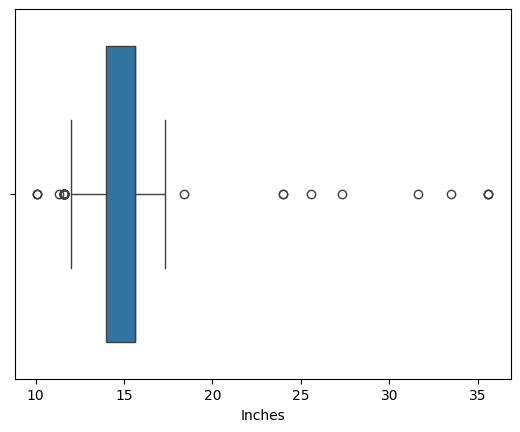

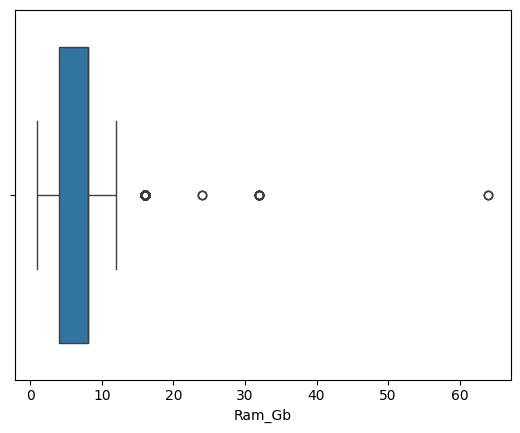

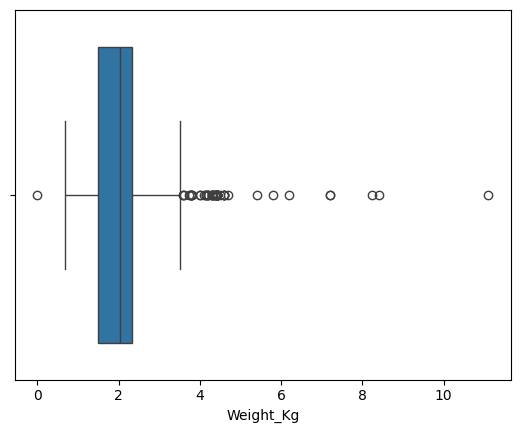

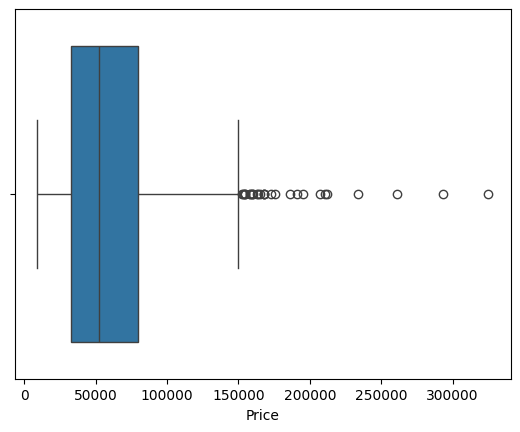

In [32]:
#Checking for outliers

def iqr_plot(column_list):
  for column in column_list:
    sns.boxplot(df[column],orient="h")
    plt.show()

numeric_list = ["Inches", "Ram_Gb", "Weight_Kg", "Price"]
iqr_plot(numeric_list)

In [33]:
#To deal with outliers, I am writing a function with Winsorization
import pandas as pd
import numpy as np

def winsorize_outliers(df, columns, lower_percentile=5, upper_percentile=95):
    """
    Winsorize outliers in the specified columns of a pandas DataFrame.

    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        columns (list): A list of column names in which outliers should be winsorized.
        lower_percentile (float): The lower percentile below which values are considered outliers.
                                  Default is 5.
        upper_percentile (float): The upper percentile above which values are considered outliers.
                                  Default is 95.

    Returns:
        DataFrame: A copy of the input DataFrame with outliers winsorized.
    """
    df_winsorized = df.copy()

    for col in columns:
        lower_bound = np.percentile(df[col], lower_percentile)
        upper_bound = np.percentile(df[col], upper_percentile)

        # Replace values below the lower bound with the lower bound
        df_winsorized[col] = np.where(df_winsorized[col] < lower_bound, lower_bound, df_winsorized[col])

        # Replace values above the upper bound with the upper bound
        df_winsorized[col] = np.where(df_winsorized[col] > upper_bound, upper_bound, df_winsorized[col])

    return df_winsorized

numeric_list = ["Inches", "Ram_Gb", "Weight_Kg", "Price"]
winsorize_outliers(df, numeric_list)
df.head(30)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_Gb,Memory,Gpu,OpSys,Weight_Kg,Price
0,Apple,Ultrabook,13.300000,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.000000,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370000,71378.683200
1,Apple,Ultrabook,13.300000,1440x900,Intel Core i5 1.8GHz,8.000000,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.340000,47895.523200
2,HP,Notebook,15.600000,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.000000,256GB SSD,Intel HD Graphics 620,No OS,1.860000,30636.000000
3,Apple,Ultrabook,15.400000,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.000000,512GB SSD,AMD Radeon Pro 455,macOS,1.830000,135195.336000
4,Apple,Ultrabook,13.300000,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.000000,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.370000,96095.808000
5,Acer,Notebook,15.600000,1366x768,AMD A9-Series 9420 3GHz,4.000000,500GB HDD,AMD Radeon R5,Windows 10,2.100000,21312.000000
6,Apple,Ultrabook,15.400000,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16.000000,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.040000,114017.601600
7,Apple,Ultrabook,13.300000,1440x900,Intel Core i5 1.8GHz,8.000000,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.340000,61735.536000
8,Asus,Ultrabook,14.000000,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16.000000,512GB SSD,Nvidia GeForce MX150,Windows 10,1.300000,79653.600000
9,Acer,Ultrabook,14.000000,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.000000,256GB SSD,Intel UHD Graphics 620,Windows 10,1.600000,41025.600000


In [34]:
def feature_scaling(data, columns):
    scaler = MinMaxScaler()
    data_scaled = data.copy()
    data_scaled[columns] = scaler.fit_transform(data_scaled[columns])
    return data_scaled

# Assuming 'df' is your DataFrame containing the dataset
columns_to_scale = ["Inches", "Ram_Gb", "Weight_Kg", "Price"]

scaled_df = feature_scaling(df, columns_to_scale)

scaled_df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_Gb,Memory,Gpu,OpSys,Weight_Kg,Price
0,Apple,Ultrabook,0.125490,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,0.111111,128GB SSD,Intel Iris Plus Graphics 640,macOS,0.123408,0.196741
1,Apple,Ultrabook,0.125490,1440x900,Intel Core i5 1.8GHz,0.111111,128GB Flash Storage,Intel HD Graphics 6000,macOS,0.120705,0.122353
2,HP,Notebook,0.215686,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,0.111111,256GB SSD,Intel HD Graphics 620,No OS,0.167553,0.067679
3,Apple,Ultrabook,0.207843,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,0.238095,512GB SSD,AMD Radeon Pro 455,macOS,0.164850,0.398895
4,Apple,Ultrabook,0.125490,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,0.111111,256GB SSD,Intel Iris Plus Graphics 650,macOS,0.123408,0.275038
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,0.215686,1366x768,Intel Core i7 6500U 2.5GHz,0.047619,500GB HDD,Nvidia GeForce 920M,Windows 10,0.198184,0.092206
1270,Lenovo,2 in 1 Convertible,0.152941,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,0.047619,128GB SSD,Intel HD Graphics 520,Windows 10,0.162147,0.078312
1271,Lenovo,2 in 1 Convertible,0.125490,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,0.238095,512GB SSD,Intel HD Graphics 520,Windows 10,0.117101,0.223629
1272,Lenovo,Notebook,0.152941,1366x768,Intel Celeron Dual Core N3050 1.6GHz,0.015873,64GB Flash Storage,Intel HD Graphics,Windows 10,0.135120,0.009283


In [35]:
scaled_df.rename(columns = {'Inches':'NormalizedInches', 'Ram_Gb':'NormalizedRam','Weight_Kg':'NormalizedWeight', 'Price':'NormalizedPrice'}, inplace = True)

<Axes: >

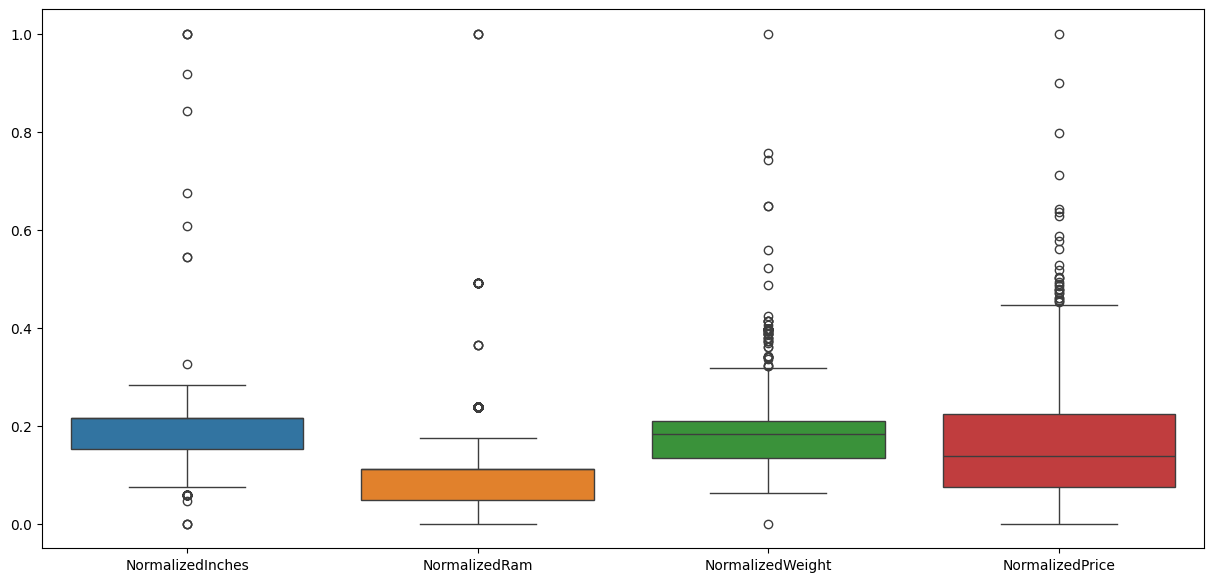

In [36]:
plt.figure(figsize = (15,7))
sns.boxplot(scaled_df)

#Feature Engineering:

* Extract meaningful features to enhance model performance.

* Consider creating new features that capture the essence of laptop pricing.

In [37]:
#encoded_scaled_df.drop(columns=['IsTouchScreen'], inplace=True)

In [38]:
def extract_screen_size(df):
    df_with_screen_size = df.copy()
    df_with_screen_size['ScreenResolution'] = df_with_screen_size['ScreenResolution'].str.split().str[-1]
    df_with_screen_size['ScreenResolution'] = df_with_screen_size['ScreenResolution'].str.replace('x', '').astype(float)
    df_with_screen_size = df_with_screen_size.sort_values(by='ScreenResolution')  # Sort by ScreenResolution
    return df_with_screen_size

def mark_touch_screen(dataframe, column_name):
    """
    Function to determine if the data in the categorical column 'ScreenResolution'
    indicates a touch screen or not based on the presence of the word 'Touchscreen'.
    It marks the values in a new column 'IsTouchScreen' as True or False.

    Parameters:
        dataframe (DataFrame): The pandas DataFrame containing the data.
        column_name (str): The name of the categorical column to analyze.

    Returns:
        None
    """
    dataframe.insert(4, 'IsTouchScreen', dataframe[column_name].str.contains('Touchscreen', case=False))

#marking boolean values for ScreenResolution
mark_touch_screen(scaled_df, 'ScreenResolution')

# Extracting screen size
df_with_screen_size = extract_screen_size(scaled_df)

In [39]:
def extract_screen_resolution(dataframe, column_name):
    """
    Function to extract the screen resolution width and height from the 'ScreenResolution' feature
    and insert them as new columns at the specified positions in the DataFrame.

    Parameters:
        dataframe (DataFrame): The pandas DataFrame containing the data.
        column_name (str): The name of the column containing screen resolution information.

    Returns:
        dataframe (DataFrame): The pandas DataFrame with two new columns for screen resolution width and height.
    """
    # Define regular expressions to capture different screen resolution formats
    resolution_pattern = re.compile(r'(\d+)\s*x\s*(\d+)')

    # Extract width and height using regular expressions
    extracted_resolution = dataframe[column_name].str.extract(resolution_pattern)

    # Convert the extracted values to numeric type
    width = pd.to_numeric(extracted_resolution[0], errors='coerce')
    height = pd.to_numeric(extracted_resolution[1], errors='coerce')

    # Insert new columns for screen resolution width and height at specified positions in the DataFrame
    dataframe.insert(5, 'ScreenResolutionWidth', width)
    dataframe.insert(6, 'ScreenResolutionHeight', height)

    return dataframe

encoded_scaled_df = extract_screen_resolution(scaled_df, 'ScreenResolution')
print(encoded_scaled_df[['ScreenResolution', 'ScreenResolutionWidth', 'ScreenResolutionHeight']].head())

                     ScreenResolution  ScreenResolutionWidth  \
0  IPS Panel Retina Display 2560x1600                   2560   
1                            1440x900                   1440   
2                   Full HD 1920x1080                   1920   
3  IPS Panel Retina Display 2880x1800                   2880   
4  IPS Panel Retina Display 2560x1600                   2560   

   ScreenResolutionHeight  
0                    1600  
1                     900  
2                    1080  
3                    1800  
4                    1600  


In [49]:
#dummy code block to check info
print(encoded_scaled_df.head(), '\n')
print(encoded_scaled_df.info())
# uv = encoded_scaled_df['NormalizedWeight'].unique()
# print(uv)

  Company   TypeName  NormalizedInches                    ScreenResolution  \
0   Apple  Ultrabook          0.125490  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook          0.125490                            1440x900   
2      HP   Notebook          0.215686                   Full HD 1920x1080   
3   Apple  Ultrabook          0.207843  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook          0.125490  IPS Panel Retina Display 2560x1600   

   IsTouchScreen  ScreenResolutionWidth  ScreenResolutionHeight  \
0          False                   2560                    1600   
1          False                   1440                     900   
2          False                   1920                    1080   
3          False                   2880                    1800   
4          False                   2560                    1600   

                          Cpu  NormalizedRam               Memory  \
0        Intel Core i5 2.3GHz       0.111111            128

In [54]:
# calculating Innovationg Score
def NormalizedInnovationScore(data):
    # Copy the original dataframe to avoid modifying the original data
    df = data.copy()

    # Step 1: Normalize continuous features
    scaler = MinMaxScaler()
    continuous_features = ['NormalizedInches', 'NormalizedRam', 'NormalizedWeight']
    df[continuous_features] = scaler.fit_transform(df[continuous_features])

    # Step 2: Encode categorical features
    categorical_features = ['Cpu', 'Gpu', 'Memory']
    encoded_features = pd.get_dummies(df[categorical_features])

    # Step 3: Combine all features
    all_features = pd.concat([df[continuous_features], encoded_features], axis=1)

    # Step 4: Calculate innovation score with equal weights
    weights = {feature: 1.0 for feature in all_features.columns}
    innovation_score = (all_features * pd.Series(weights)).sum(axis=1)

    # Step 5: Normalize the innovation score
    min_score = innovation_score.min()
    max_score = innovation_score.max()
    normalized_innovation_score = (innovation_score - min_score) / (max_score - min_score)

    # Add the normalized innovation score as a new column to the DataFrame
    df['NormalizedInnovation'] = normalized_innovation_score

    return df


normalized_df = NormalizedInnovationScore(encoded_scaled_df)


In [58]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Company                 1245 non-null   category
 1   TypeName                1245 non-null   category
 2   NormalizedInches        1245 non-null   float64 
 3   ScreenResolution        1245 non-null   category
 4   IsTouchScreen           1245 non-null   bool    
 5   ScreenResolutionWidth   1245 non-null   int64   
 6   ScreenResolutionHeight  1245 non-null   int64   
 7   Cpu                     1245 non-null   category
 8   NormalizedRam           1245 non-null   float64 
 9   Memory                  1245 non-null   category
 10  Gpu                     1245 non-null   category
 11  OpSys                   1245 non-null   category
 12  NormalizedWeight        1245 non-null   float64 
 13  NormalizedPrice         1245 non-null   float64 
 14  NormalizedInnovation    

In [70]:
import pandas as pd

# Calculate correlation matrix
correlation_matrix = normalized_df.corr()

# Calculate correlation with NormalizedPrice
correlation_with_price = correlation_matrix['NormalizedPrice'].sort_values(ascending=False)

# Displaying correlation with NormalizedPrice
print("Correlation with NormalizedPrice:\n")
print(correlation_with_price,'\n')

Correlation with NormalizedPrice:

NormalizedPrice           1.000000
NormalizedRam             0.681922
ScreenResolutionWidth     0.553039
ScreenResolutionHeight    0.549308
NormalizedInnovation      0.439659
IsTouchScreen             0.186386
NormalizedWeight          0.176346
NormalizedInches          0.042421
Name: NormalizedPrice, dtype: float64 



<ipython-input-70-5bc2c453c7c7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = normalized_df.corr()


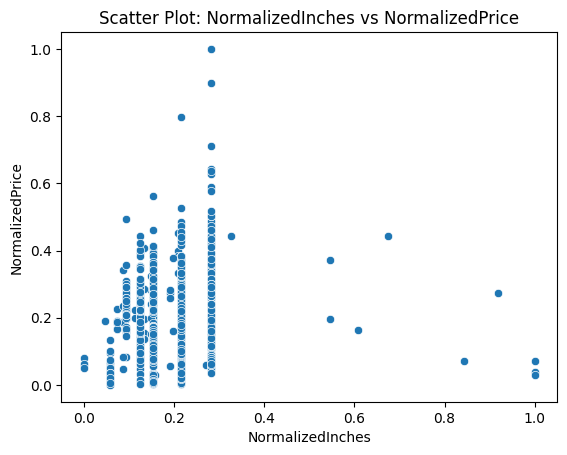

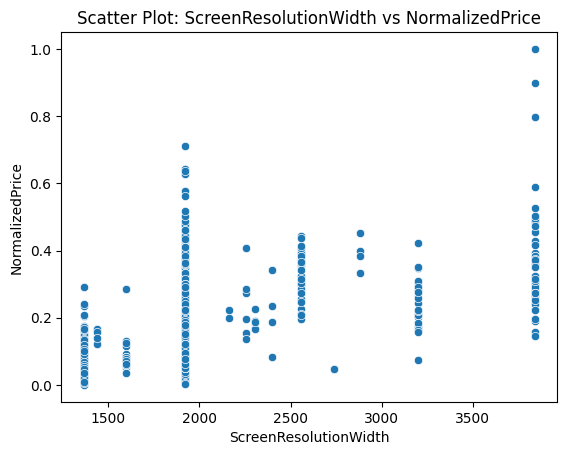

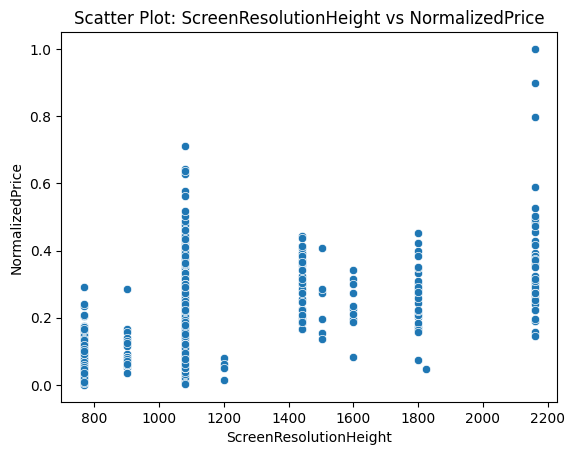

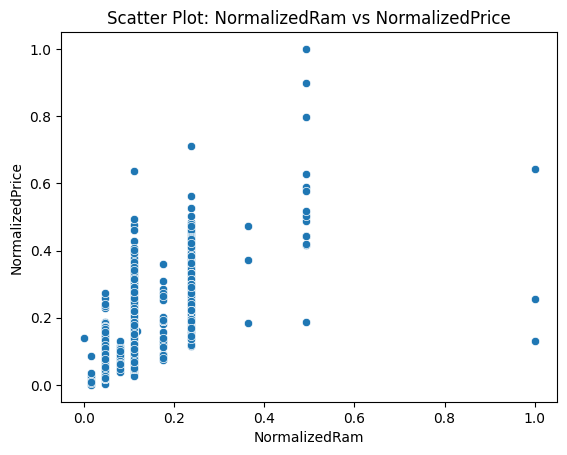

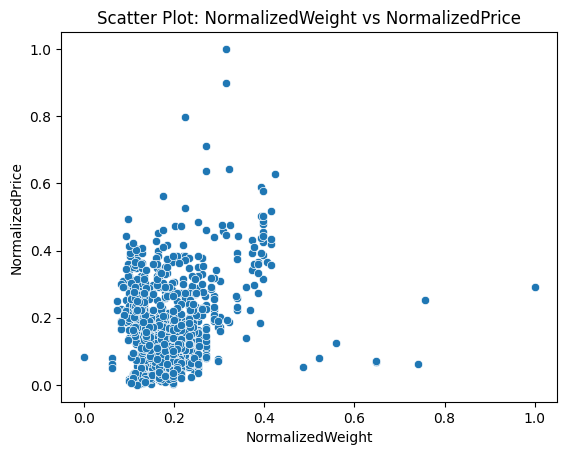

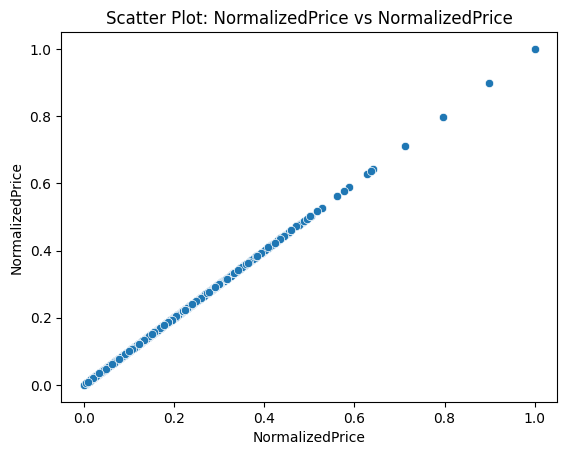

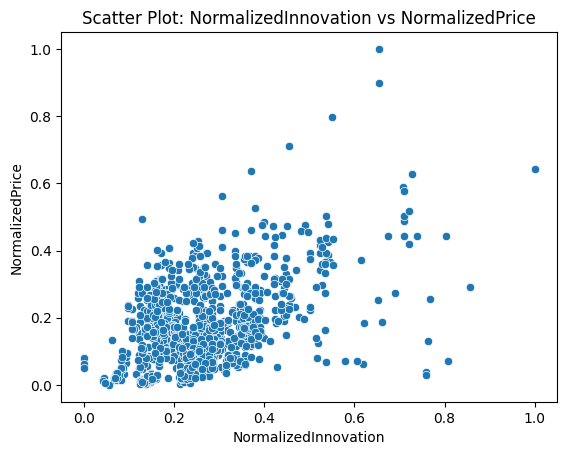

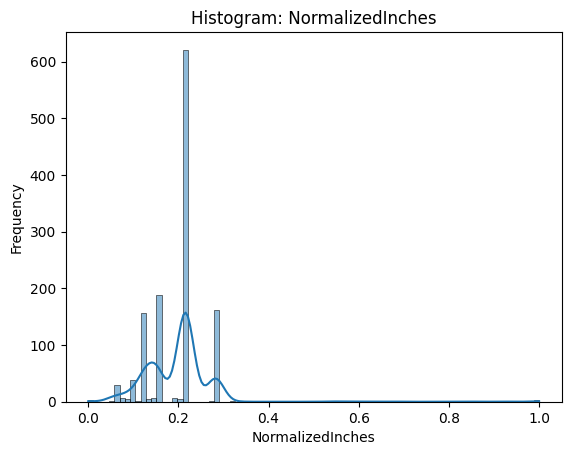

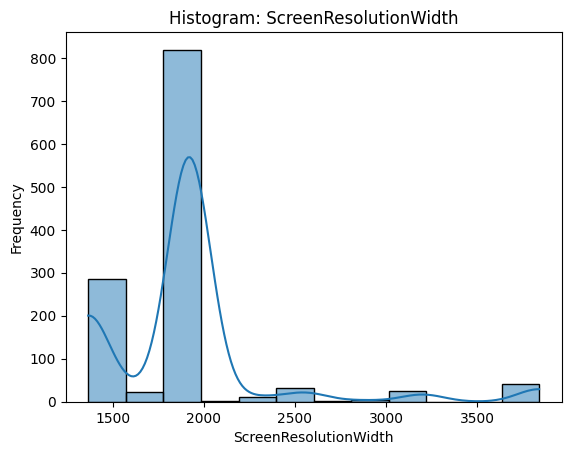

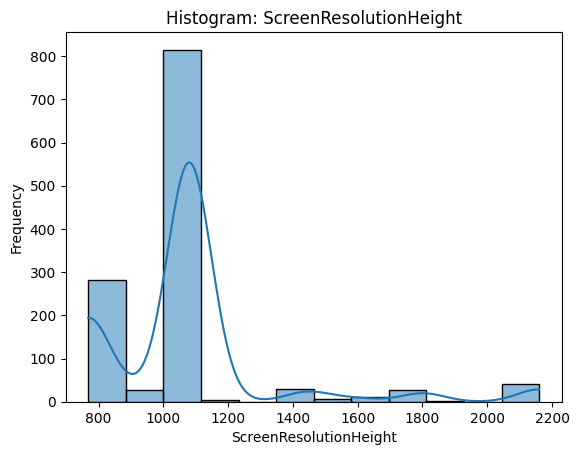

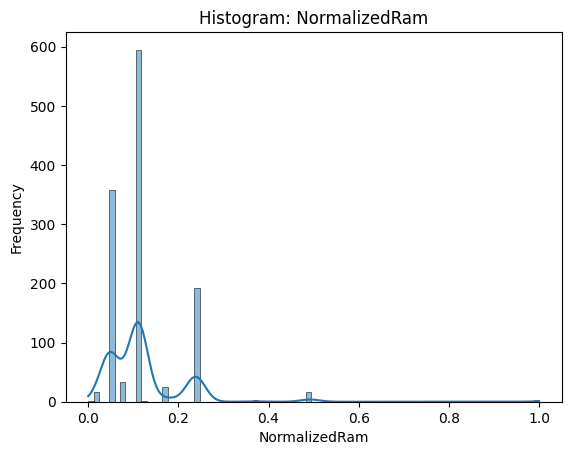

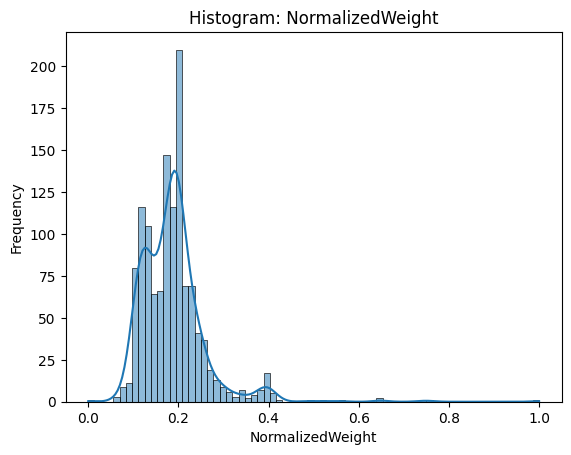

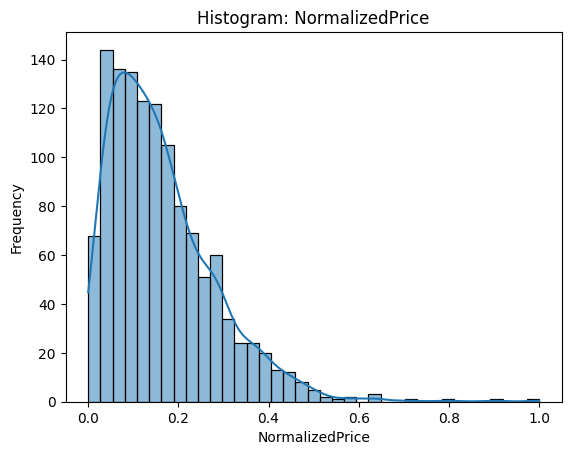

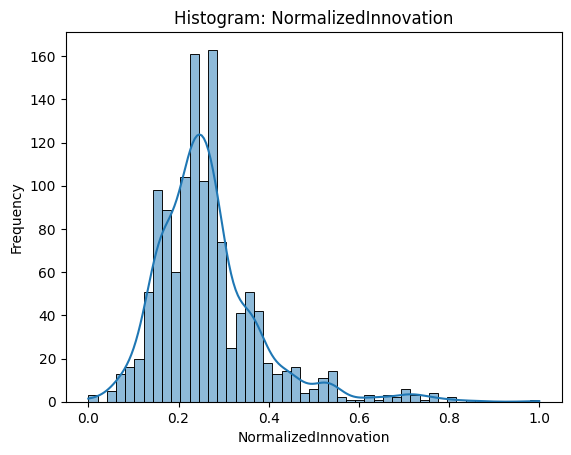

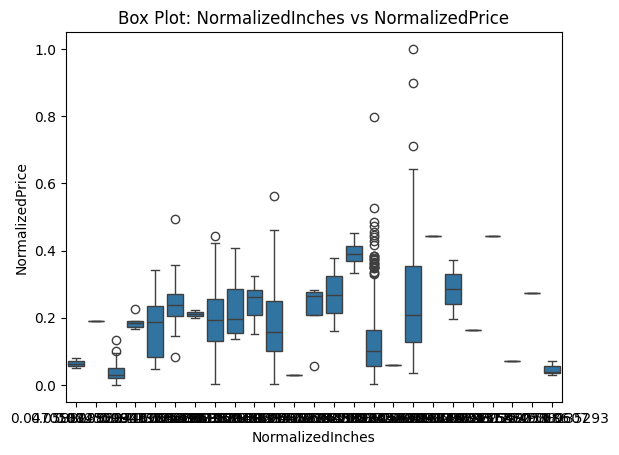

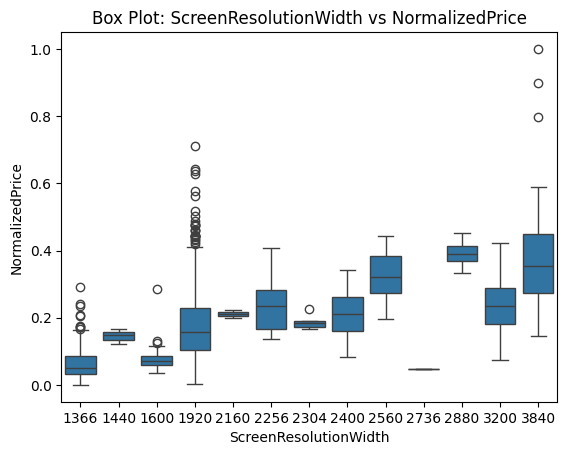

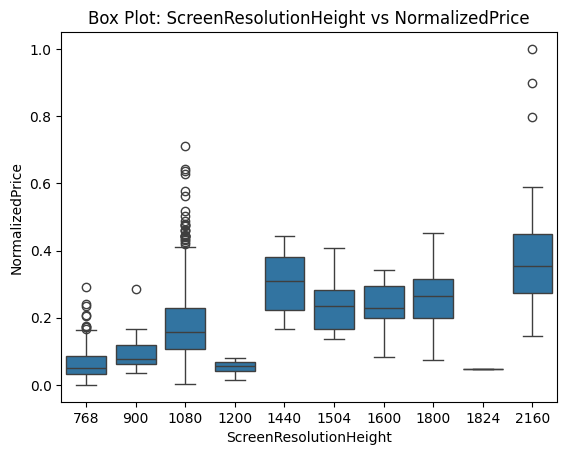

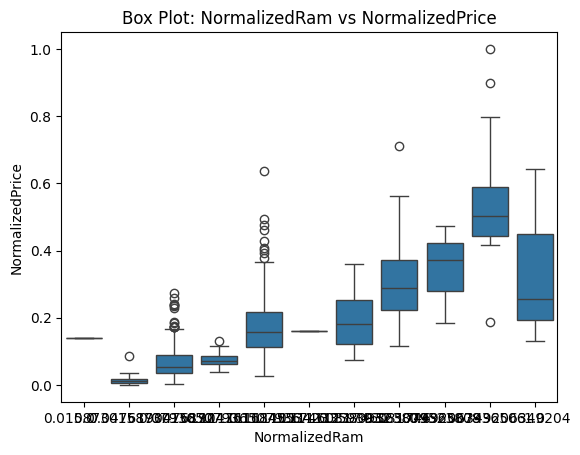

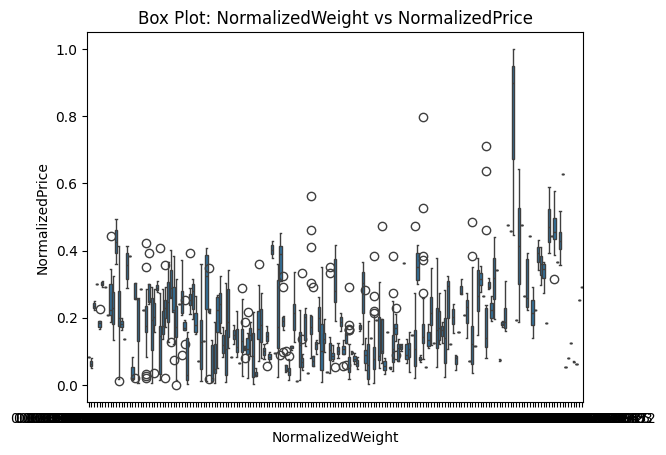

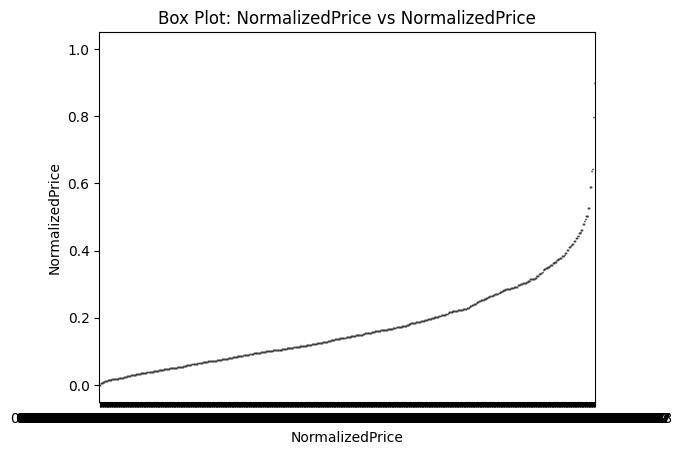

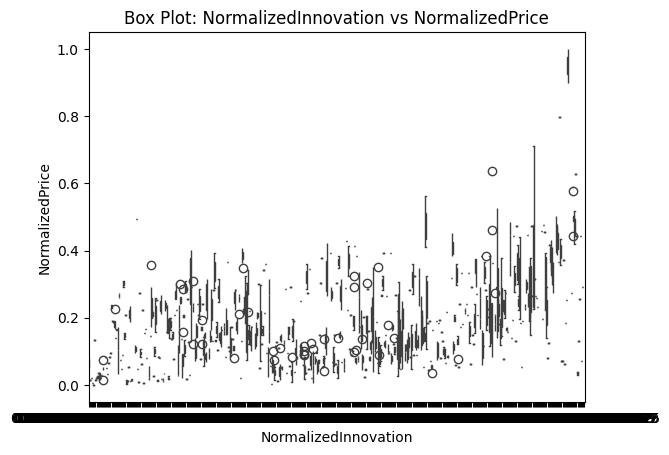

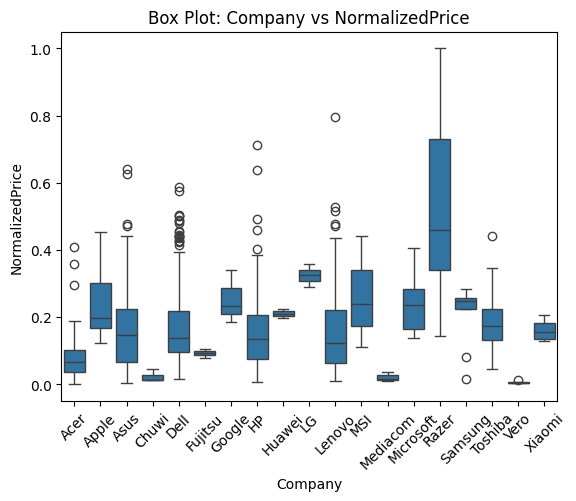

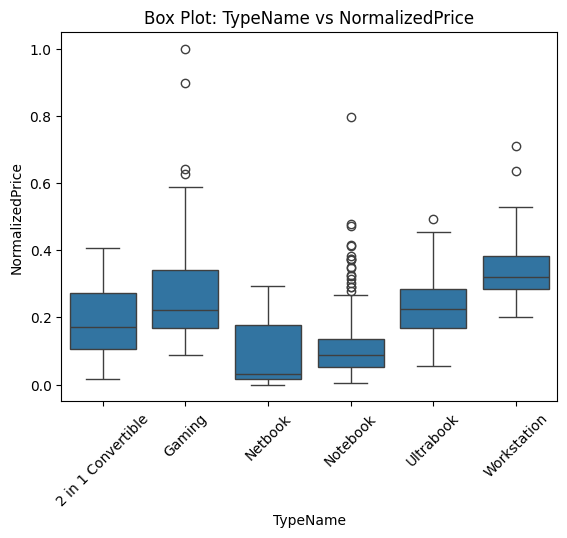

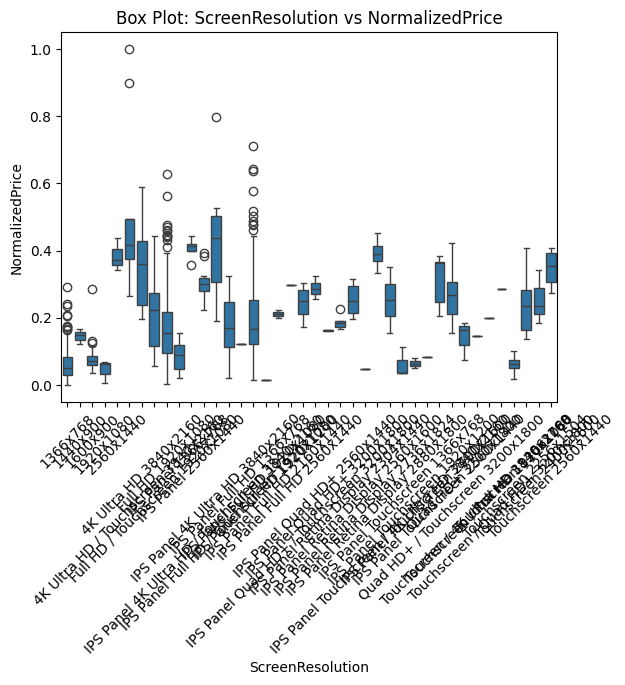

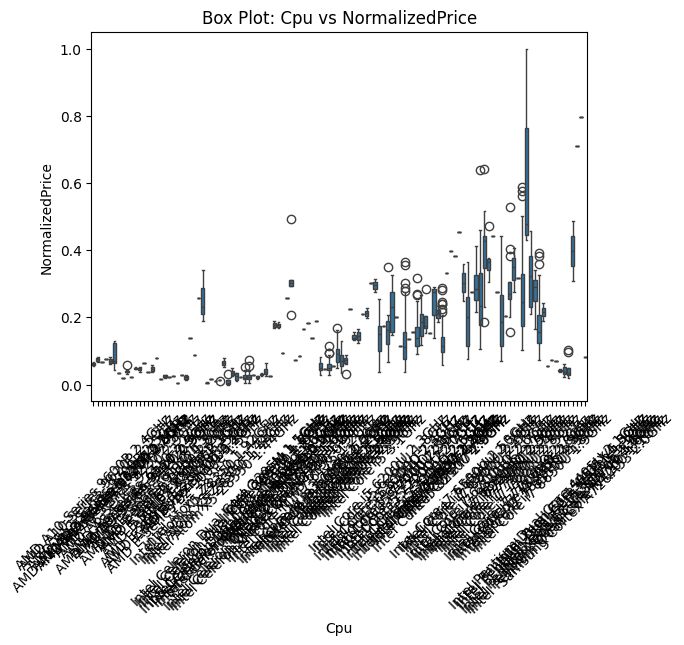

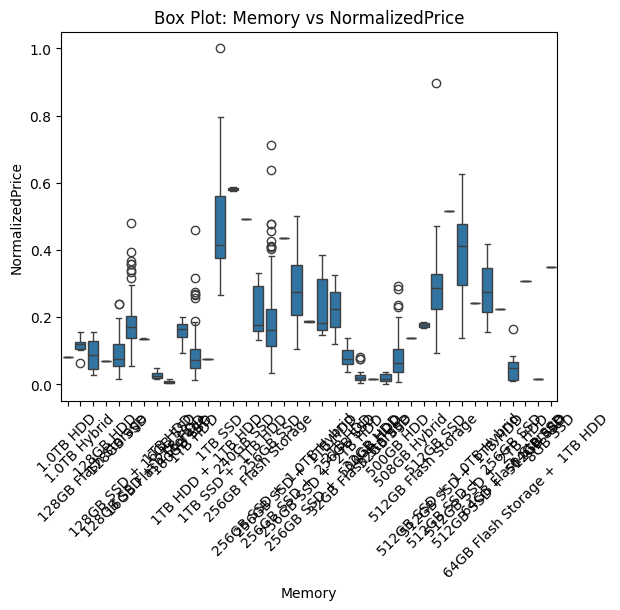

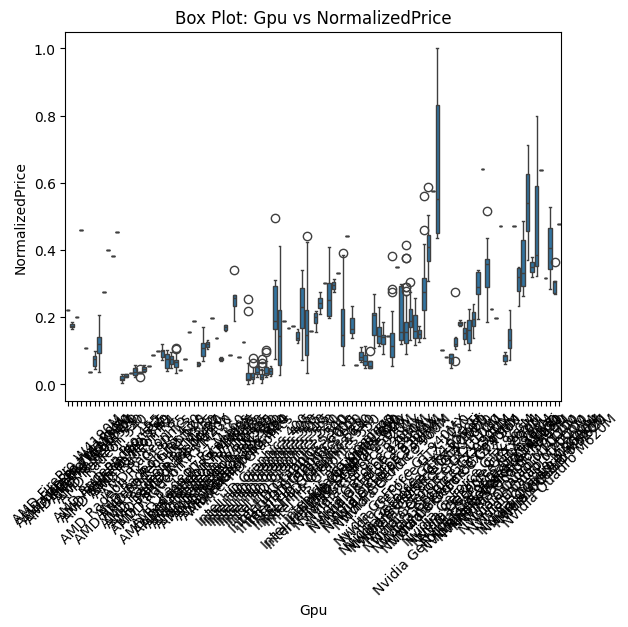

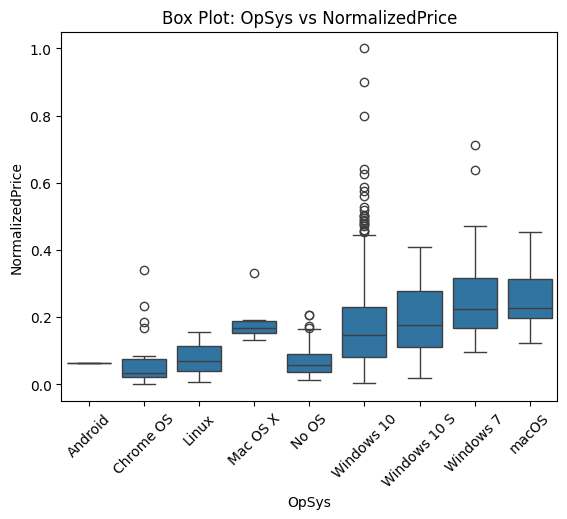

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features to visualize, including categorical columns
features_to_visualize = ['Company', 'TypeName', 'NormalizedInches', 'ScreenResolution', 'IsTouchScreen',
                         'ScreenResolutionWidth', 'ScreenResolutionHeight', 'Cpu', 'NormalizedRam',
                         'Memory', 'Gpu', 'OpSys', 'NormalizedWeight']

# Visualize relationships using scatter plots for numeric features
numeric_features = normalized_df.select_dtypes(include=['float64', 'int64']).columns
for feature in numeric_features:
    sns.scatterplot(x=normalized_df[feature], y=normalized_df['NormalizedPrice'])
    plt.title(f'Scatter Plot: {feature} vs NormalizedPrice')
    plt.xlabel(feature)
    plt.ylabel('NormalizedPrice')
    plt.show()

# Visualize distributions using histograms for numeric features
for feature in numeric_features:
    sns.histplot(data=normalized_df, x=feature, kde=True)
    plt.title(f'Histogram: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize relationships using box plots for numeric features
for feature in numeric_features:
    sns.boxplot(x=normalized_df[feature], y=normalized_df['NormalizedPrice'])
    plt.title(f'Box Plot: {feature} vs NormalizedPrice')
    plt.xlabel(feature)
    plt.ylabel('NormalizedPrice')
    plt.show()

# Visualize relationships using box plots for categorical features
categorical_features = normalized_df.select_dtypes(include=['category']).columns
for feature in categorical_features:
    sns.boxplot(x=normalized_df[feature], y=normalized_df['NormalizedPrice'])
    plt.title(f'Box Plot: {feature} vs NormalizedPrice')
    plt.xlabel(feature)
    plt.ylabel('NormalizedPrice')
    plt.xticks(rotation=45)
    plt.show()
